<h2> Testing skill weighting with business analyst </h2>

In [ ]:
import pandas as pd
ba = pd.read_csv('/content/business analyst_skills.csv')
ba.head()

#Getting min and max count from our dataset
min_count = ba['Count'].min()
max_count = ba['Count'].max()

# Min-Max scaling
ba['weightage'] = (ba['Count'] - min_count) / (max_count - min_count)




In [ ]:
ba.head()

,Element,Count,weightage
0,business analysis,85,1.000000
1,business analyst,73,0.857143
2,it skills,61,0.714286
3,sql,43,0.500000
4,requirement gathering,39,0.452381


In [ ]:
ba.to_csv('weighted_ba.csv')

<h2> Creating weighted graph </h2>

Weighted ba skills was made by comparing our original ba skill map dataset and adding weights from weighted_ba to the skill

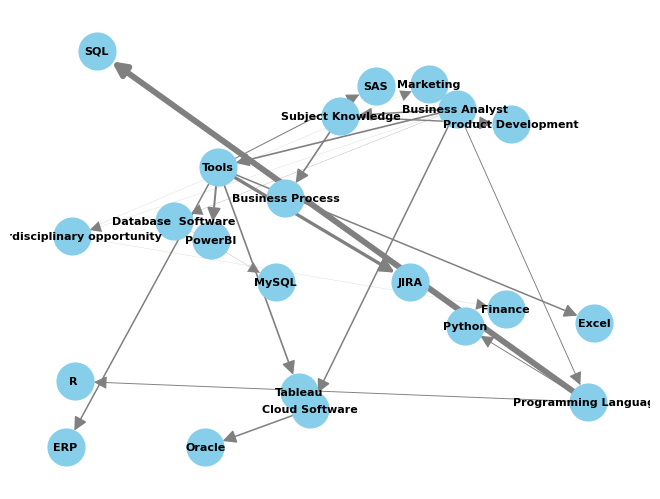

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#Multiplied weightage with 8.5 so that the edges are more thick and visible
ba_skills = pd.read_csv('/content/weighted_ba_skills.csv')
ba_skills['Weightage'] = ba_skills['Weightage'] * 8.5
# Create a directed graph
G = nx.DiGraph()

# Add edges with different weights for each skill and tool from the DataFrame
for _, row in ba_skills.iterrows():
    job_title = row['Job Title']
    category = row['Category']
    skill_tool = row['Skills and tools']
    weight = row['Weightage']

    G.add_node(job_title)
    G.add_edge(job_title, category, weight=weight)
    G.add_edge(category, skill_tool, weight=weight)

# Draw the graph with varying arrow thickness based on the weight
pos = nx.random_layout(G)
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]  # Normalize weights to [0, 1]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='skyblue',
    font_size=8,
    font_color='black',
    font_weight='bold',
    edge_color='gray',
    width=edge_weights,  # Varying width based on normalized weights
    arrowsize=20
)

# Display the plot
plt.show()


In [ ]:
nx.write_gexf(G, 'weightage_ba.gexf')

In [ ]:
ds = pd.read_csv('/content/data science_skills.csv')
se = pd.read_csv('/content/software engineer_skills.csv')

In [ ]:
min_count = se['Count'].min()
max_count = se['Count'].max()

# Min-Max scaling
se['weightage'] = (se['Count'] - min_count) / (max_count - min_count)

In [ ]:
min_count = ds['Count'].min()
max_count = ds['Count'].max()

# Min-Max scaling
ds['weightage'] = (ds['Count'] - min_count) / (max_count - min_count)

In [ ]:
se.head()

,Element,Count,weightage
0,it skills,279,1.000000
1,java,197,0.705036
2,testing,134,0.478417
3,javascript,124,0.442446
4,cloud,112,0.399281


In [ ]:
ds.head()

,Element,Count,weightage
0,machine learning,134,1.000000
1,python,134,1.000000
2,data science,92,0.684211
3,it skills,43,0.315789
4,r,43,0.315789


In [ ]:
ds.to_csv('weighted_ds.csv')
se.to_csv('weighted_se.csv')

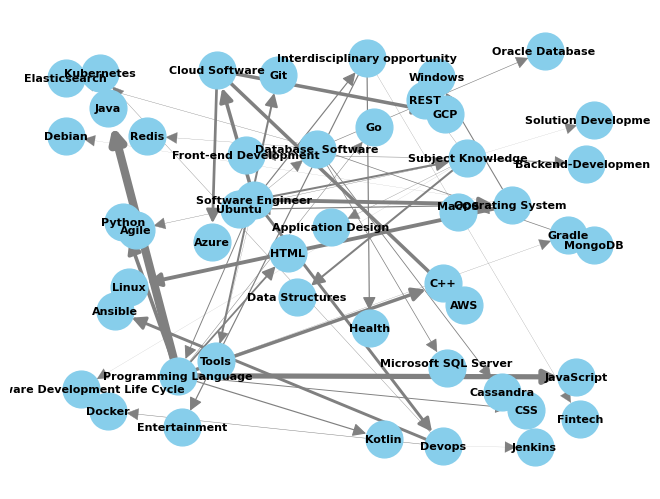

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


se_skills = pd.read_csv('/content/weighted_se_skills.csv')
se_skills['Weightage'] = se_skills['Weightage'] * 8.5
# Create a directed graph
G = nx.DiGraph()

# Add edges with different weights for each skill and tool from the DataFrame
for _, row in se_skills.iterrows():
    job_title = row['Job Title']
    category = row['Category']
    skill_tool = row['Skills and tools']
    weight = row['Weightage']

    G.add_node(job_title)
    G.add_edge(job_title, category, weight=weight)
    G.add_edge(category, skill_tool, weight=weight)

# Draw the graph with varying arrow thickness based on the weight
pos = nx.random_layout(G)
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
edge_weights_normalized = [w / max(edge_weights) for w in edge_weights]  # Normalize weights to [0, 1]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='skyblue',
    font_size=8,
    font_color='black',
    font_weight='bold',
    edge_color='gray',
    width=edge_weights,  # Varying width based on normalized weights
    arrowsize=20
)

# Display the plot
plt.show()


In [ ]:
nx.write_gexf(G,'weighted_se.gexf')

<h2> Creating weighted charts </h2>

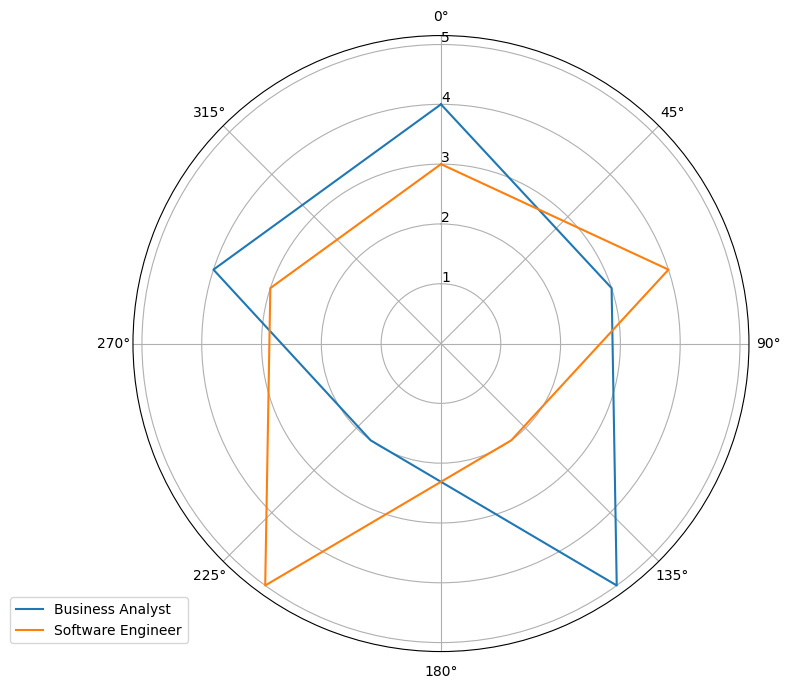

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your data)
job_titles = ['Business Analyst', 'Software Engineer']
skills = ['Programming Languages', 'Tools', 'Database Software', 'Cloud Software', 'SQL']

proficiency_ratings = [
    [4, 3, 5, 2, 4],  # Title A
    [3, 4, 2, 5, 3],  # Title B
]

# Number of skills
num_skills = len(skills)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_skills, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

for i in range(len(job_titles)):
    values = proficiency_ratings[i]
    values = np.concatenate((values, [values[0]]))  # Close the loop
    ax.plot(angles, values, label=job_titles[i])

#ax.set_thetagrids(angles * 180 / np.pi, skills)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()